<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data(y_hat)_add_delta_(1_6)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_1.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.6_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,69.053631,37.098219,33.230984,14.200342,163.583175,152.824752,10.758423
1,0.0,1.0,47.372503,59.710436,23.492986,-36.335957,104.239969,147.998276,-43.758307
2,0.0,2.0,45.784642,81.005723,59.066473,3.991580,199.848418,193.045279,6.803139
3,0.0,3.0,46.556544,47.235357,81.982452,-46.647514,139.126839,180.242618,-41.115779
4,0.0,4.0,64.503373,31.117262,31.255596,28.437030,165.313261,142.079042,23.234219
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,29.130985,98.131128,68.902877,-58.556071,147.608920,190.905656,-43.296737
19996,999.0,16.0,45.288932,64.980346,63.120347,-30.670351,152.719274,176.917501,-24.198228
19997,999.0,17.0,62.606657,25.422351,93.384537,12.528130,203.941676,199.842202,4.099473
19998,999.0,18.0,99.754055,89.265624,98.931361,33.333046,331.284085,330.020282,1.263803


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    69.053631  37.098219  33.230984  14.200342  163.583175   
      1.0    47.372503  59.710436  23.492986 -36.335957  104.239969   
      2.0    45.784642  81.005723  59.066473   3.991580  199.848418   
      3.0    46.556544  47.235357  81.982452 -46.647514  139.126839   
      4.0    64.503373  31.117262  31.255596  28.437030  165.313261   
...                ...        ...        ...        ...         ...   
999.0 15.0   29.130985  98.131128  68.902877 -58.556071  147.608920   
      16.0   45.288932  64.980346  63.120347 -30.670351  152.719274   
      17.0   62.606657  25.422351  93.384537  12.528130  203.941676   
      18.0   99.754055  89.265624  98.931361  33.333046  331.284085   
      19.0   84.768336  80.822147  74.332229  15.463212  265.385923   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    152.824752  10.758423  
      1.0    147.998276 -43.758307  
      2.0    193.045279   6.803139  
      3.0    180.242618 -41.115779  
      4.0    142.079042  23.234219  
...                 ...        ...  
999.0 15.0   190.905656 -43.296737  
      16.0   176.917501 -24.198228  
      17.0   199.842202   4.099473  
      18.0   330.020282   1.263803  
      19.0   269.155723  -3.769800  

[20000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    69.053631  37.098219  33.230984  14.200342  163.583175   
      1.0    47.372503  59.710436  23.492986 -36.335957  104.239969   
      2.0    45.784642  81.005723  59.066473   3.991580  199.848418   
      3.0    46.556544  47.235357  81.982452 -46.647514  139.126839   
      4.0    64.503373  31.117262  31.255596  28.437030  165.313261   
...                ...        ...        ...        ...         ...   
999.0 15.0   29.130985  98.131128  68.902877 -58.556071  147.608920   
      16.0   45.288932  64.980346  63.120347 -30.670351  152.719274   
      17.0   62.606657  25.422351  93.384537  12.528130  203.941676   
      18.0   99.754055  89.265624  98.931361  33.333046  331.284085   
      19.0   84.768336  80.822147  74.332229  15.463212  265.385923   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    152.824752  10.758423  
      1.0    147.998276 -43.758307  
      2.0    193.045279   6.803139  
      3.0    180.242618 -41.115779  
      4.0    142.079042  23.234219  
...                 ...        ...  
999.0 15.0   190.905656 -43.296737  
      16.0   176.917501 -24.198228  
      17.0   199.842202   4.099473  
      18.0   330.020282   1.263803  
      19.0   269.155723  -3.769800  

[20000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,69.053631,37.098219,33.230984,14.200342,163.583175,152.824752,10.758423
1,0.0,1.0,47.372503,59.710436,23.492986,-36.335957,104.239969,147.998276,-43.758307
2,0.0,2.0,45.784642,81.005723,59.066473,3.991580,199.848418,193.045279,6.803139
3,0.0,3.0,46.556544,47.235357,81.982452,-46.647514,139.126839,180.242618,-41.115779
4,0.0,4.0,64.503373,31.117262,31.255596,28.437030,165.313261,142.079042,23.234219
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,29.130985,98.131128,68.902877,-58.556071,147.608920,190.905656,-43.296737
19996,999.0,16.0,45.288932,64.980346,63.120347,-30.670351,152.719274,176.917501,-24.198228
19997,999.0,17.0,62.606657,25.422351,93.384537,12.528130,203.941676,199.842202,4.099473
19998,999.0,18.0,99.754055,89.265624,98.931361,33.333046,331.284085,330.020282,1.263803


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    69.053631  37.098219  33.230984  14.200342  163.583175   
      1.0    47.372503  59.710436  23.492986 -36.335957  104.239969   
      2.0    45.784642  81.005723  59.066473   3.991580  199.848418   
      3.0    46.556544  47.235357  81.982452 -46.647514  139.126839   
      4.0    64.503373  31.117262  31.255596  28.437030  165.313261   
...                ...        ...        ...        ...         ...   
999.0 15.0   29.130985  98.131128  68.902877 -58.556071  147.608920   
      16.0   45.288932  64.980346  63.120347 -30.670351  152.719274   
      17.0   62.606657  25.422351  93.384537  12.528130  203.941676   
      18.0   99.754055  89.265624  98.931361  33.333046  331.284085   
      19.0   84.768336  80.822147  74.332229  15.463212  265.385923   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    152.824752  10.758423  
      1.0    147.998276 -43.758307  
      2.0    193.045279   6.803139  
      3.0    180.242618 -41.115779  
      4.0    142.079042  23.234219  
...                 ...        ...  
999.0 15.0   190.905656 -43.296737  
      16.0   176.917501 -24.198228  
      17.0   199.842202   4.099473  
      18.0   330.020282   1.263803  
      19.0   269.155723  -3.769800  

[20000 rows x 7 columns]

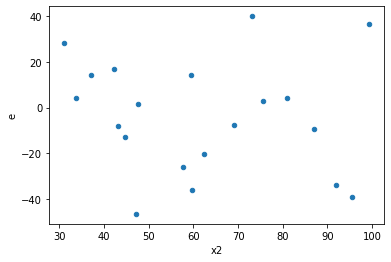

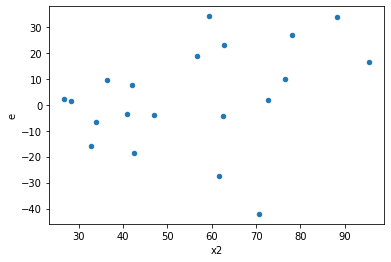

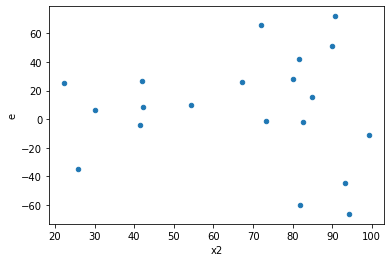

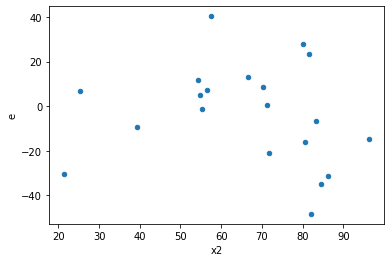

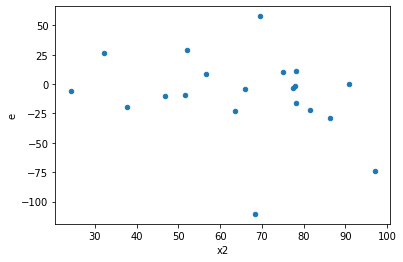

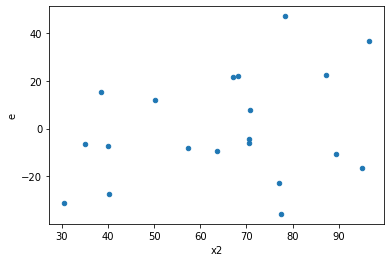

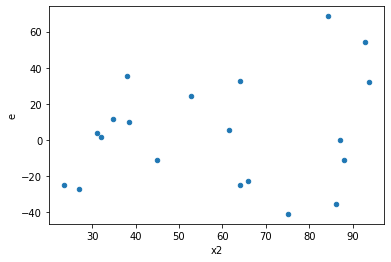

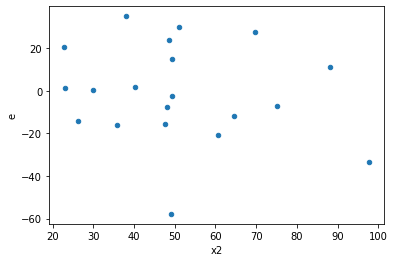

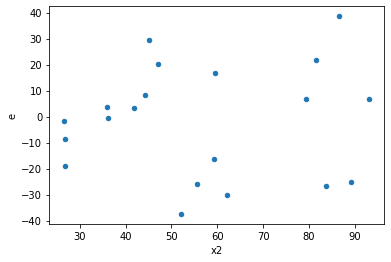

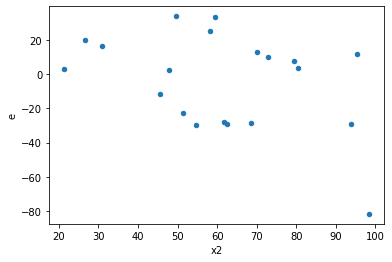

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,10.0,4.0,6059.0939350693125,3297.7354679810373,605.9093935069312,824.4338669952593,1.360655365026666,0.8224263022991791,0.5887868488504104,0.41121315114958956,Reject001=1 : Homoscedasticity
1.0,10.0,4.0,2712.284429869296,3015.700118585694,271.2284429869296,753.9250296464235,2.7796680220693326,0.33656474956778215,0.8317176252161089,0.16828237478389108,Reject001=1 : Homoscedasticity
2.0,9.0,5.0,7901.706371009897,9793.90792114849,877.9673745566553,1958.781584229698,2.2310414270448473,0.3903737916159058,0.8048131041920471,0.1951868958079529,Reject001=1 : Homoscedasticity
3.0,5.0,9.0,1712.1065571617007,3731.1354965933465,342.42131143234013,414.57061073259405,1.2107032970537235,0.7550114156344154,0.6224942921827923,0.3775057078172077,Reject001=1 : Homoscedasticity
5.0,3.0,11.0,1880.7745774444202,6725.283241328892,626.9248591481401,611.3893855753538,0.9752195604527539,0.8785666740569165,0.5607166629715418,0.43928333702845823,Reject001=1 : Homoscedasticity
6.0,6.0,8.0,2492.8123004238864,4732.807395318956,415.4687167373144,591.6009244148695,1.4239361486966466,0.6269437338051058,0.6865281330974471,0.3134718669025529,Reject001=1 : Homoscedasticity
7.0,6.0,8.0,2483.417767434696,6053.19144913326,413.902961239116,756.6489311416575,1.8280829131457546,0.42122803145791066,0.7893859842710447,0.21061401572895533,Reject001=1 : Homoscedasticity
10.0,6.0,8.0,1606.9624236900995,4959.817895019652,267.82707061501657,619.9772368774564,2.314841570920335,0.2699279472381064,0.8650360263809468,0.1349639736190532,Reject001=1 : Homoscedasticity
11.0,3.0,11.0,1642.8018516622728,6032.6667629936055,547.6006172207576,548.4242511812369,1.0015040778526865,0.8568313896923752,0.5715843051538124,0.4284156948461876,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,4.0,6059.0939350693125,3297.7354679810373,605.9093935069312,824.4338669952593,1.360655365026666,0.8224263022991791,Reject001=1 : Homoscedasticity
1.0,10.0,4.0,2712.284429869296,3015.700118585694,271.2284429869296,753.9250296464235,2.7796680220693326,0.33656474956778215,Reject001=1 : Homoscedasticity
2.0,9.0,5.0,7901.706371009897,9793.90792114849,877.9673745566553,1958.781584229698,2.2310414270448473,0.3903737916159058,Reject001=1 : Homoscedasticity
3.0,5.0,9.0,1712.1065571617007,3731.1354965933465,342.42131143234013,414.57061073259405,1.2107032970537235,0.7550114156344154,Reject001=1 : Homoscedasticity
4.0,9.0,5.0,14963.665557729697,3818.8138024083605,1662.6295064144108,763.7627604816721,0.4593703874104734,0.2932342077640145,Reject001=1 : Homoscedasticity
5.0,3.0,11.0,1880.7745774444202,6725.283241328892,626.9248591481401,611.3893855753538,0.9752195604527539,0.8785666740569165,Reject001=1 : Homoscedasticity
6.0,6.0,8.0,2492.8123004238864,4732.807395318956,415.4687167373144,591.6009244148695,1.4239361486966466,0.6269437338051058,Reject001=1 : Homoscedasticity
7.0,6.0,8.0,2483.417767434696,6053.19144913326,413.902961239116,756.6489311416575,1.8280829131457546,0.42122803145791066,Reject001=1 : Homoscedasticity
8.0,11.0,3.0,4846.801155384901,1025.227356214216,440.61828685317283,341.7424520714053,0.7755975234529566,0.6530522980126832,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      830
Reject001=0 : Heteroscedasticity    170
Name: Result_test, dtype: int64